### Data Munging - Scale, Clean and Transform ###

What is this?
> 
* Scaling refers to the scaling of data to a similar scale
* Transformation refers to the process by which we change the nature of values in features/variables - e.g. qualitative to numeric
* Data cleaning refers to the process of dealing with missing or bad data

Why do we need to do this?
> *Garbage in, garbage out* <br> This is a fairly important step in the building of data models, given that the factors used in regression can -
* vary significantly in their scale, e.g. shoe sizes versus waist sizes
* vary in their nature, e.g. real world measurements versus satisfaction scores
* be quite dirty, given that the aggregated data can be from a range of sources, and subject to human errors during data entry

** Scaling **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
% matplotlib inline

Let's use a random dataset based on shopping needs and preferences from a survey that we created previously and saved to a CSV.

In [2]:
responses  = pd.read_csv('responses.csv')

In [3]:
responses.head()

,Unnamed: 0,No,Gender,Height,Weight,Shoe Size,Shopping Satisfaction Offline,Shopping Satisfaction Online,Average Spent Per Month
0,0,1,Male,112,70,5,High,High,8426.542289
1,1,2,LGBT,163,48,8,Medium,Medium,2014.683750
2,2,3,Male,133,42,4,High,Medium,3018.070226
3,3,4,Female,121,66,5,High,Low,3598.173445
4,4,5,Female,171,36,11,High,Medium,4755.219329


Let's drop the first two columns

In [4]:
responses.columns[0],responses.columns[1]

('Unnamed: 0', 'No')

In [5]:
responses = responses.drop([responses.columns[0],responses.columns[1]], axis=1)

In [6]:
responses.head(3)

,Gender,Height,Weight,Shoe Size,Shopping Satisfaction Offline,Shopping Satisfaction Online,Average Spent Per Month
0,Male,112,70,5,High,High,8426.542289
1,LGBT,163,48,8,Medium,Medium,2014.683750
2,Male,133,42,4,High,Medium,3018.070226


In [7]:
X_numerical = responses[['Height','Weight','Shoe Size']].values
X_categorical = responses[['Gender','Shopping Satisfaction Offline', 'Shopping Satisfaction Online']]

In [8]:
X = responses.iloc[:, :-1].values # all data except the last column
y = responses['Average Spent Per Month'].values

First, let us try applying ** standardisation ** of the variables.
> What a full standardisation does is to center the mean to zero and variance to unit variance.

First let us see the results if we just center the mean to zero. As we can only do so for numerical data, we only apply these to the numerical columns that we extracted earlier.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
centering = StandardScaler(with_mean=True, with_std=False)
X_num_scaled_zeromean = centering.fit_transform(X_numerical)

/anaconda/envs/pydata/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


We can also do so for y. Note that we have y is now just a single column with one dimension, i.e. (500,), but the scaler requires the dimension to be (500,1). So we have to reshape it.

In [11]:
y_scaled_zeromean = centering.fit_transform(y.reshape(-1,1))

In [15]:
np.mean(X_num_scaled_zeromean)

-1.9421501444109404e-15

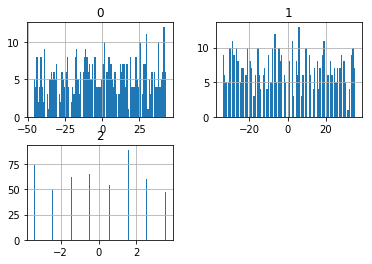

In [16]:
pd.DataFrame(X_num_scaled_zeromean).hist(bins=100)
plt.show()

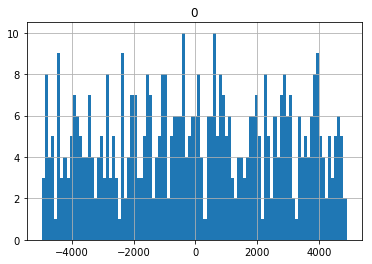

In [17]:
pd.DataFrame(y_scaled_zeromean).hist(bins=100)
plt.show()

In [18]:
np.mean(y_scaled_zeromean)

9.0221874415874481e-13

You can see that we get results that are super close to the mean of zero that we set.

Next, let's scale to unit variance

In [19]:
standardisation = StandardScaler(with_mean=True, with_std=True)
X_num_scaled_stdvar = standardisation.fit_transform(X_numerical)
y_scaled_stdvar = standardisation.fit_transform(y.reshape(-1,1))

/anaconda/envs/pydata/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [20]:
print(np.mean(X_num_scaled_stdvar), np.var(X_num_scaled_stdvar))

-4.67773967709e-17 1.0


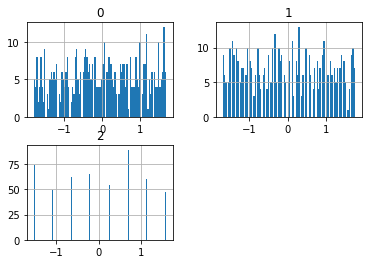

In [21]:
pd.DataFrame(X_num_scaled_stdvar).hist(bins=100)
plt.show()

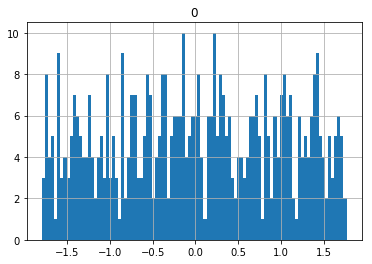

In [22]:
pd.DataFrame(y_scaled_stdvar).hist(bins=100)
plt.show()

In [23]:
print(np.mean(y_scaled_stdvar), np.var(y_scaled_stdvar))

3.2684965845e-16 1.0


Now, for ** normalisation ** ...

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaling = MinMaxScaler(feature_range=(0,1))

X_num_scaled_normalised = scaling.fit_transform(X_numerical)
y_scaled_normalised = scaling.fit_transform(y.reshape(-1,1))

print(np.mean(X_num_scaled_normalised), np.var(X_num_scaled_normalised))

0.500239467746 0.090560882511


/anaconda/envs/pydata/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


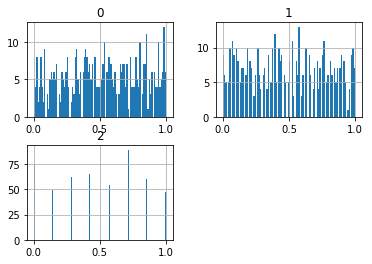

In [27]:
pd.DataFrame(X_num_scaled_normalised).hist(bins=100)
plt.show()

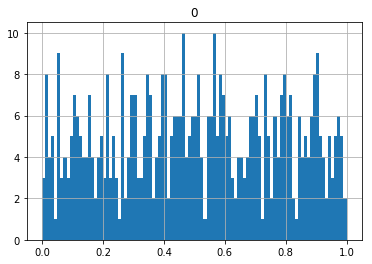

In [28]:
pd.DataFrame(y_scaled_normalised).hist(bins=100)
plt.show()

In [29]:
print(np.mean(y_scaled_normalised), np.var(y_scaled_normalised))

0.503743293898 0.0791302281983


This transformation may not be suitable in all cases, as you may lose important information. However, one advantage of this over standardisation is that it could potentially take up less memory - the standardisation process changes zero to mean, and makes zeros in original data non-zero; whereas normalisation will maintain the zeros.

** Transformation **

Transformation is quite straightforward. And we have actually seen it previously in action when we did 2nd and 3rd order polynomial regression.

Say we think the square weight is a better feature to be used to predict monthly spending as the relationship is not linear, all you would have to do is to apply the relevant mathematical operation to the feature/variable 

In [41]:
np.power(responses['Weight'].values,2)[:10]

array([4900, 2304, 1764, 4356, 1296, 7396, 6241, 7225, 5625, 2601])

In [42]:
responses['Weight'].values[:10]

array([70, 48, 42, 66, 36, 86, 79, 85, 75, 51])

We can also apply other transformations, e.g. log, exp, squared, cubed, square root, cube root, inverse

** Dealing with missing numbers **

In [64]:
import numpy as np
example = np.array([1,2,np.nan,4,5])
np.isnan(example)

array([False, False,  True, False, False], dtype=bool)

In [65]:
np.nan_to_num(example) # places a 0 in the location

array([ 1.,  2.,  0.,  4.,  5.])

In [90]:
from random import sample, seed
import numpy as np

seed(19)

Xm = X_numerical.copy()
missing = sample(range(len(Xm)), len(Xm)//4)
# random.sample(population, k)
# Return a k length list of unique elements chosen from the population sequence. Used for random sampling without replacement.
# // is floor division 9//4=2
Xm_slice = Xm[:,2].astype(np.float64) # filling in random spots in the second column with nan
Xm_slice.dtype
Xm_slice[missing] = np.nan
Xm_slice[:10]

array([  5.,  nan,   4.,  nan,  11.,   8.,   7.,   9.,  nan,   7.])

In [91]:
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN', strategy='mean', axis=1)
impute.fit_transform(Xm_slice[:10])

/anaconda/envs/pydata/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  5.        ,   7.28571429,   4.        ,   7.28571429,
         11.        ,   8.        ,   7.        ,   9.        ,
          7.28571429,   7.        ]])

#### Categorical Data ####

In [95]:
X_categorical

,Gender,Shopping Satisfaction Offline,Shopping Satisfaction Online
0,Male,High,High
1,LGBT,Medium,Medium
2,Male,High,Medium
3,Female,High,Low
4,Female,High,Medium
5,LGBT,High,High
6,LGBT,Low,High
7,Female,High,Medium
8,Male,High,Medium
9,Female,Medium,Medium


In [99]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X_categorical_encoded = lb_make.fit_transform(X_categorical['Gender'])
X_categorical_encoded

array([2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0,
       1, 2,

In [103]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
X_categorical_binarised = lb.fit_transform(X_categorical['Gender'])
pd.DataFrame(X_categorical_binarised, columns=lb.classes_).head()

,Female,LGBT,Male
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
